In [1]:
# Cargar a la memoria de trabajo las bibliotecas: Pandas (manejo de datos, 
# Numpy (numerical python) y la biblioteca de gráficas Matplotlib
# Se asignan nombres cortos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#
# Usar "Shift+Enter" para procesar la información de la celda
#

In [2]:
# Descarga los datos de una estación del Servicio Meteorológico Nacional
# http://smn1.conagua.gob.mx/emas/
# Lee un archivo de texto con la función Pandas "read_csv", con elementos separados por mas de 
# un espacio, brincándose 4 renglones del inicio (encabezados)
df0 = pd.read_csv('ecoguardas.txt', skiprows=4, sep='\s+')
# "Shift + Enter"

In [3]:
# Lee los primeros 5 renglones del archivo
df0.head()
# "Shift+Enter"

,DD/MM/AAAA,HH:MM,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
0,30/01/2018,23:00,81,120,2.74,10.2,10.1,30,756.3,0.0,64.8
1,31/01/2018,00:00,52,83,2.38,8.3,8.9,37,756.4,0.0,3.8
2,31/01/2018,01:00,64,100,3.26,9.6,7.4,48,756.7,0.0,0.0
3,31/01/2018,02:00,23,38,3.18,6.3,5.6,60,757.2,0.0,0.0
4,31/01/2018,03:00,0,51,2.14,5.5,4.9,68,757.6,0.0,0.0


In [4]:
# Dar estructura de datos (DataFrame)
df = pd.DataFrame(df0)

In [5]:
# Ver los tipos de datos que Pandas ha reconocido al leer
df.dtypes

DD/MM/AAAA     object
HH:MM          object
DIRS            int64
DIRR            int64
VELS          float64
VELR          float64
TEMP          float64
HR              int64
PB            float64
PREC          float64
RADSOL        float64
dtype: object

In [6]:
# Combinar las columnas "DD/MM/AAAA" con "HH:MM" y convertirla a variable de tiempo
# Se crea una nueva columna "Fecha" al final con formato de tiempo.
# Eliminamos las dos primeras columnas que ya no necesitaremos
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['DD/MM/AAAA'] + ' ' + x['HH:MM'], 1), dayfirst=True)
df = df.drop(['DD/MM/AAAA', 'HH:MM'], 1)

In [7]:
df.head()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA
0,81,120,2.74,10.2,10.1,30,756.3,0.0,64.8,2018-01-30 23:00:00
1,52,83,2.38,8.3,8.9,37,756.4,0.0,3.8,2018-01-31 00:00:00
2,64,100,3.26,9.6,7.4,48,756.7,0.0,0.0,2018-01-31 01:00:00
3,23,38,3.18,6.3,5.6,60,757.2,0.0,0.0,2018-01-31 02:00:00
4,0,51,2.14,5.5,4.9,68,757.6,0.0,0.0,2018-01-31 03:00:00


In [8]:
# Selecciona los renglones con Temperatura > 24ºC y < 25ºC
df_tmp = df[df.TEMP > 24] 
df_select = df_tmp[df_tmp.TEMP < 25]
df_select

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA
118,154,141,4.80,15.3,24.3,22,755.1,0.0,589.2,2018-02-04 21:00:00
165,120,205,6.81,20.8,24.7,21,755.9,0.0,796.2,2018-02-06 20:00:00


In [9]:
# Calcula el promedio de las columnas, excepto en la FECHA (que no tendría sentido)
df.mean()

DIRS      225.604790
DIRR      266.101796
VELS        5.814671
VELR       14.482635
TEMP       13.274850
HR         53.568862
PB        757.273054
PREC        0.000000
RADSOL    210.873653
dtype: float64

In [10]:
# Calcula el promedio de las Temperaturas
df.TEMP.mean()

13.274850299401198

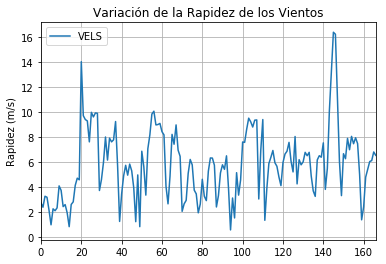

In [11]:
# Gráfica de la rapidez de los vientos (m/s) 
plt.figure(); df.VELS.plot(); plt.legend(loc='best')
plt.title("Variación de la Rapidez de los Vientos")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()

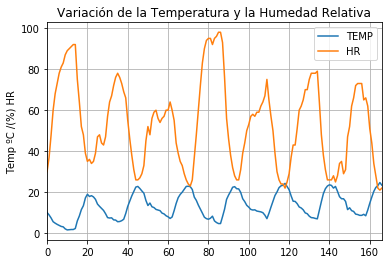

In [12]:
# Gráfica de Temperatura y Humedad Relativa
df1 = df[['TEMP','HR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Variación de la Temperatura y la Humedad Relativa")
plt.ylabel("Temp ºC /(%) HR")
plt.grid(True)
plt.show()

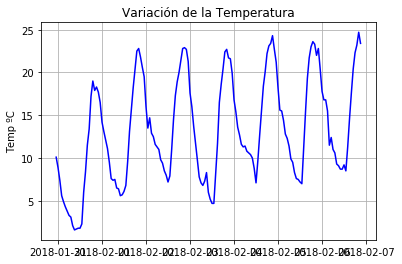

In [13]:
plt.plot_date(x=df.FECHA, y=df.TEMP, fmt="b-")
plt.title("Variación de la Temperatura")
plt.ylabel("Temp ºC")
plt.grid(True)
plt.show()

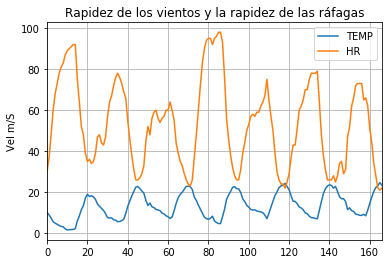

In [14]:
#Crear una gráfica que muestre la rapidez de los vientos y la rapidez de las ráfagas, como funciones del tiempo.
df2 = df[['VELS','VELR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Rapidez de los vientos y la rapidez de las ráfagas")
plt.ylabel("Vel m/S")
plt.grid(True)
plt.show()
#

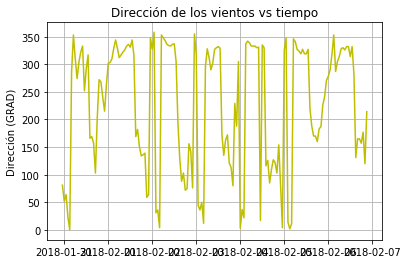

In [23]:
#Crear una gráfica con la dirección de los vientos como función del tiempo y comentar sobre los vientos dominantes en el sitio de estudio.
plt.plot_date(x=df.FECHA, y=df.DIRS, fmt="y-")
plt.title("Dirección de los vientos vs tiempo")
plt.ylabel("Dirección (GRAD)")
plt.grid(True)
plt.show()
#La velocidad aumenta al medio día. 

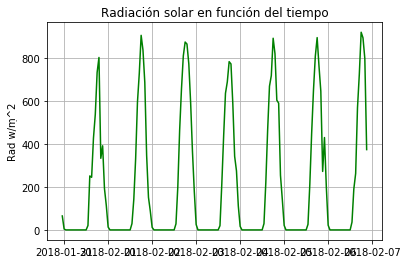

In [24]:
#Muestre el comportamiento de la Radiación Solar como función del tiempo. 
plt.plot_date(x=df.FECHA, y=df.RADSOL, fmt="g-")
plt.title("Radiación solar en función del tiempo")
plt.ylabel("Rad w/ṃ^2")
plt.grid(True)
plt.show()


In [20]:
#¿Cuál es el lapso de temperatura diaria? (Diferencia entre la temperatura máxima y la mínima). 
df1=df[['TEMP']]
df1.max()-df1.min()


TEMP    23.1
dtype: float64

In [25]:
#¿Puedes comentar sobre la relación entre la temperatura y la humedad relativa? 
#La humedad relativa aumenta de manera mucho más considerable que la temperatura.

In [22]:
#Realiza el análisis exploratorio de datos, que resuma el sitio estudiado (Usar la función describe() sobre tu data frame.
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.0,167.000000
mean,225.604790,266.101796,5.814671,14.482635,13.274850,53.568862,757.273054,0.0,210.873653
std,112.959368,93.577468,2.836451,6.181229,6.172888,21.129115,1.399373,0.0,299.659476
min,0.000000,38.000000,0.560000,3.800000,1.600000,21.000000,754.300000,0.0,0.000000
25%,132.500000,192.500000,3.705000,10.450000,8.350000,35.000000,756.400000,0.0,0.000000
50%,274.000000,318.000000,5.780000,13.600000,12.300000,53.000000,757.200000,0.0,0.000000
75%,328.000000,338.500000,7.580000,17.650000,18.350000,68.500000,758.200000,0.0,382.150000
max,358.000000,360.000000,16.410000,36.700000,24.700000,98.000000,760.900000,0.0,918.700000
